In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from src.models.coupon_distribution import *

In [4]:
pd.set_option("display.max_columns", 50)

## Initialize CouponDistribution object and load data

In [5]:
coupon_dist = CouponDistribution()
coupon_dist.load_data(
    customer_data_path="./data/external/customers.csv",
    segment_prob_data_path="./data/external/visit_probability.csv")

In [6]:
dict_dm_cost = {"dm1": 0.0, "dm2": 10.0, "dm3": 20.0}
min_dist_ratio = 0.1
unit_sales = 30.0

## When the max budget is fixed and not optimized

In [18]:
coupon_dist.run_optimizer(
    dict_dm_cost=dict_dm_cost, min_dist_ratio=min_dist_ratio,
    unit_sales=unit_sales, max_budget=10000.0)

INFO 2022-05-18 02:26:35,755 - status: Optimal
INFO 2022-05-18 02:26:35,755 - Obj Value: 3.466e+04
INFO 2022-05-18 02:26:35,755 - Compute Time: 0.215(s)


In [19]:
coupon_dist.df_seg_send_prob

,segment_id,age_cat,freq_cat,prob_dm1,prob_dm2,prob_dm3,send_prob_dm1,send_prob_dm2,send_prob_dm3,num_cust,num_send_dm1,num_send_dm2,num_send_dm3,num_conversion_dm1,num_conversion_dm2,num_conversion_dm3,num_conversion_statusquo,val_coupon_redeem_dm1,val_coupon_redeem_dm2,val_coupon_redeem_dm3,val_sales,val_profit,val_profit_status_quo,val_inc_profit
0,1,age~19,freq0,0.07,0.12,0.29,0.1,0.800000,0.100000,200,20.0,160.000000,20.000000,1.4,19.200000,5.800000,14.0,0.0,192.000000,116.000000,792.000000,484.000000,420.0,6.400000e+01
1,2,age~19,freq1,0.21,0.30,0.58,0.8,0.100000,0.100000,150,120.0,15.000000,15.000000,25.2,4.500000,8.700000,31.5,0.0,45.000000,174.000000,1152.000000,933.000000,945.0,-1.200000e+01
2,3,age~19,freq2,0.28,0.39,0.74,0.8,0.100000,0.100000,50,40.0,5.000000,5.000000,11.2,1.950000,3.700000,14.0,0.0,19.500000,74.000000,505.500000,412.000000,420.0,-8.000000e+00
3,4,age~19,freq3~,0.35,0.45,0.77,0.8,0.100000,0.100000,100,80.0,10.000000,10.000000,28.0,4.500000,7.700000,35.0,0.0,45.000000,154.000000,1206.000000,1007.000000,1050.0,-4.300000e+01
4,5,age20~34,freq0,0.11,0.17,0.37,0.8,0.100000,0.100000,600,480.0,60.000000,60.000000,52.8,10.200000,22.200000,66.0,0.0,102.000000,444.000000,2556.000000,2010.000000,1980.0,3.000000e+01
5,6,age20~34,freq1,0.32,0.43,0.72,0.8,0.100000,0.100000,450,360.0,45.000000,45.000000,115.2,19.350000,32.400000,144.0,0.0,193.500000,648.000000,5008.500000,4167.000000,4320.0,-1.530000e+02
6,7,age20~34,freq2,0.42,0.55,0.93,0.8,0.100000,0.100000,150,120.0,15.000000,15.000000,50.4,8.250000,13.950000,63.0,0.0,82.500000,279.000000,2178.000000,1816.500000,1890.0,-7.350000e+01
7,8,age20~34,freq3~,0.52,0.63,0.94,0.8,0.100000,0.100000,300,240.0,30.000000,30.000000,124.8,18.900000,28.200000,156.0,0.0,189.000000,564.000000,5157.000000,4404.000000,4680.0,-2.760000e+02
8,9,age35~49,freq0,0.08,0.14,0.33,0.1,0.800000,0.100000,800,80.0,640.000000,80.000000,6.4,89.600000,26.400000,64.0,0.0,896.000000,528.000000,3672.000000,2248.000000,1920.0,3.280000e+02
9,10,age35~49,freq1,0.25,0.35,0.67,0.8,0.100000,0.100000,600,480.0,60.000000,60.000000,120.0,21.000000,40.200000,150.0,0.0,210.000000,804.000000,5436.000000,4422.000000,4500.0,-7.800000e+01


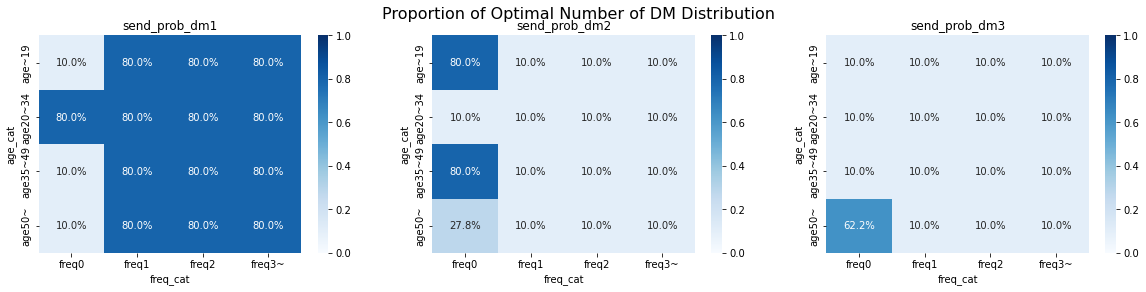

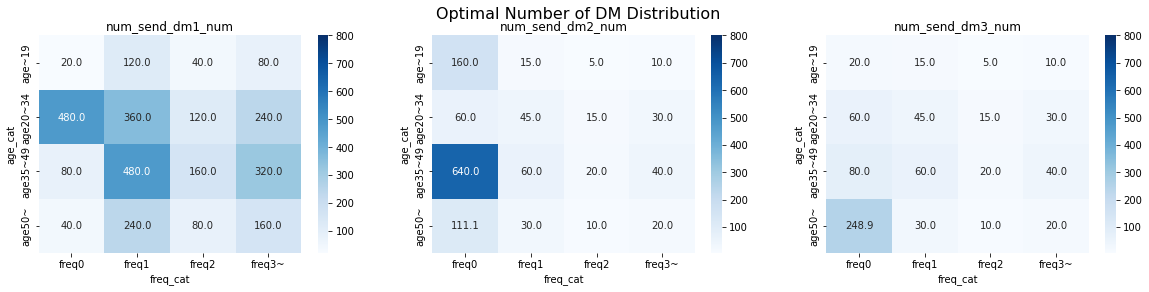

In [20]:
coupon_dist.visualize_optimized_results()

In [21]:
print(f"Budget: {coupon_dist.max_budget:.2f} USD")
print(f"Profit Increase: {coupon_dist.inc_profit:.2f} USD")
print(f"ROI: {coupon_dist.inc_profit/coupon_dist.max_budget:.2%}")

Budget: 10000.00 USD
Profit Increase: -217.15 USD
ROI: -2.17%


## When the max budget is also optimized

In [22]:
coupon_dist.run_optimizer(
    dict_dm_cost=dict_dm_cost, min_dist_ratio=min_dist_ratio,
    unit_sales=unit_sales, max_budget="optimize")

INFO 2022-05-18 02:26:42,728 - status: Optimal
INFO 2022-05-18 02:26:42,744 - Obj Value: 3.528e+04
INFO 2022-05-18 02:26:42,744 - Compute Time: 0.215(s)


In [23]:
coupon_dist.df_seg_send_prob

,segment_id,age_cat,freq_cat,prob_dm1,prob_dm2,prob_dm3,send_prob_dm1,send_prob_dm2,send_prob_dm3,num_cust,num_send_dm1,num_send_dm2,num_send_dm3,num_conversion_dm1,num_conversion_dm2,num_conversion_dm3,num_conversion_statusquo,val_coupon_redeem_dm1,val_coupon_redeem_dm2,val_coupon_redeem_dm3,val_sales,val_profit,val_profit_status_quo,val_inc_profit
0,1,age~19,freq0,0.07,0.12,0.29,0.1,0.1,0.8,200,20.0,20.0,160.0,1.4,2.40,46.40,14.0,0.0,24.0,928.0,1506.0,554.0,420.0,1.340000e+02
1,2,age~19,freq1,0.21,0.30,0.58,0.8,0.1,0.1,150,120.0,15.0,15.0,25.2,4.50,8.70,31.5,0.0,45.0,174.0,1152.0,933.0,945.0,-1.200000e+01
2,3,age~19,freq2,0.28,0.39,0.74,0.8,0.1,0.1,50,40.0,5.0,5.0,11.2,1.95,3.70,14.0,0.0,19.5,74.0,505.5,412.0,420.0,-8.000000e+00
3,4,age~19,freq3~,0.35,0.45,0.77,0.8,0.1,0.1,100,80.0,10.0,10.0,28.0,4.50,7.70,35.0,0.0,45.0,154.0,1206.0,1007.0,1050.0,-4.300000e+01
4,5,age20~34,freq0,0.11,0.17,0.37,0.1,0.1,0.8,600,60.0,60.0,480.0,6.6,10.20,177.60,66.0,0.0,102.0,3552.0,5832.0,2178.0,1980.0,1.980000e+02
5,6,age20~34,freq1,0.32,0.43,0.72,0.8,0.1,0.1,450,360.0,45.0,45.0,115.2,19.35,32.40,144.0,0.0,193.5,648.0,5008.5,4167.0,4320.0,-1.530000e+02
6,7,age20~34,freq2,0.42,0.55,0.93,0.8,0.1,0.1,150,120.0,15.0,15.0,50.4,8.25,13.95,63.0,0.0,82.5,279.0,2178.0,1816.5,1890.0,-7.350000e+01
7,8,age20~34,freq3~,0.52,0.63,0.94,0.8,0.1,0.1,300,240.0,30.0,30.0,124.8,18.90,28.20,156.0,0.0,189.0,564.0,5157.0,4404.0,4680.0,-2.760000e+02
8,9,age35~49,freq0,0.08,0.14,0.33,0.1,0.1,0.8,800,80.0,80.0,640.0,6.4,11.20,211.20,64.0,0.0,112.0,4224.0,6864.0,2528.0,1920.0,6.080000e+02
9,10,age35~49,freq1,0.25,0.35,0.67,0.8,0.1,0.1,600,480.0,60.0,60.0,120.0,21.00,40.20,150.0,0.0,210.0,804.0,5436.0,4422.0,4500.0,-7.800000e+01


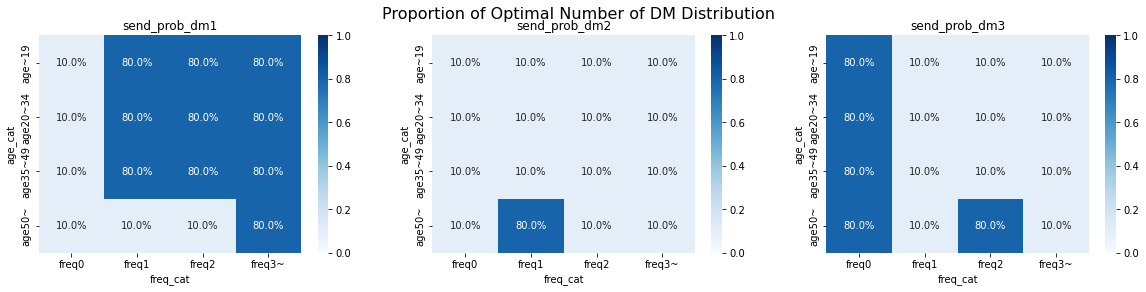

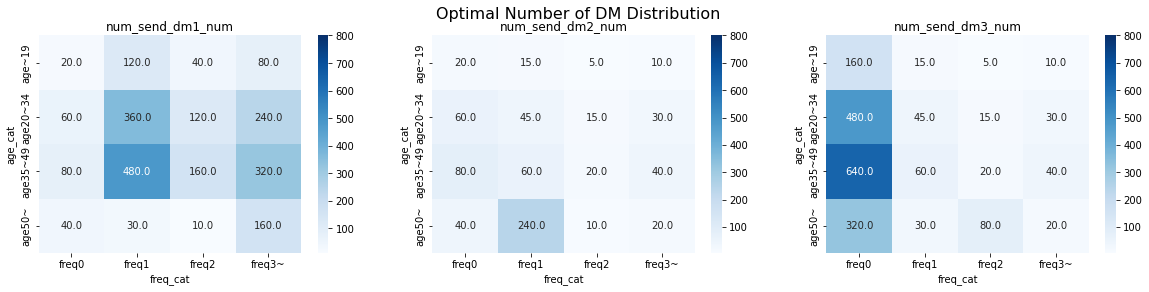

In [24]:
coupon_dist.visualize_optimized_results()

In [25]:
print(f"Budget: {coupon_dist.max_budget:.2f} USD")
print(f"Profit Increase: {coupon_dist.inc_profit:.2f} USD")
print(f"ROI: {coupon_dist.inc_profit/coupon_dist.max_budget:.2%}")

Budget: 18895.50 USD
Profit Increase: 406.50 USD
ROI: 2.15%


## When the unit_sales is higher

In [14]:
coupon_dist.run_optimizer(
    dict_dm_cost=dict_dm_cost, min_dist_ratio=min_dist_ratio,
    unit_sales=40, max_budget="optimize")

INFO 2022-05-18 02:34:30,224 - status: Optimal
INFO 2022-05-18 02:34:30,224 - Obj Value: 5.796e+04
INFO 2022-05-18 02:34:30,224 - Compute Time: 0.184(s)


In [15]:
print(f"Budget: {coupon_dist.max_budget:.2f} USD")
print(f"Profit Increase: {coupon_dist.inc_profit:.2f} USD")
print(f"ROI: {coupon_dist.inc_profit/coupon_dist.max_budget:.2%}")

Budget: 45719.50 USD
Profit Increase: 11460.50 USD
ROI: 25.07%


## Simulate the transition by change of max_budget

In [7]:
ls_max_budget = []
ls_inc_conv = []
ls_redeem = []
for b in range(5000, 30000, 1000):
    coupon_dist.run_optimizer(max_budget=b)
    ls_max_budget += [b]
    ls_inc_conv += [
        coupon_dist.df_seg_send_prob[["num_conversion_" + dm for dm in dict_dm_cost.keys()]].sum().sum()
        - coupon_dist.df_seg_send_prob["num_conversion_statusquo"].sum()]
    ls_redeem += [coupon_dist.df_seg_send_prob[["val_coupon_redeem_" + dm for dm in dict_dm_cost.keys()]].sum().sum()]

INFO 2022-05-18 02:32:28,648 - status: Infeasible
INFO 2022-05-18 02:32:28,648 - Obj Value: 3.375e+04
INFO 2022-05-18 02:32:28,648 - Compute Time: 0.473(s)
INFO 2022-05-18 02:32:28,854 - status: Infeasible
INFO 2022-05-18 02:32:28,855 - Obj Value: 3.374e+04
INFO 2022-05-18 02:32:28,855 - Compute Time: 0.174(s)
INFO 2022-05-18 02:32:29,058 - status: Infeasible
INFO 2022-05-18 02:32:29,059 - Obj Value: 3.39e+04
INFO 2022-05-18 02:32:29,060 - Compute Time: 0.179(s)
INFO 2022-05-18 02:32:29,240 - status: Optimal
INFO 2022-05-18 02:32:29,241 - Obj Value: 3.427e+04
INFO 2022-05-18 02:32:29,242 - Compute Time: 0.16(s)
INFO 2022-05-18 02:32:29,420 - status: Optimal
INFO 2022-05-18 02:32:29,420 - Obj Value: 3.454e+04
INFO 2022-05-18 02:32:29,421 - Compute Time: 0.156(s)
INFO 2022-05-18 02:32:29,602 - status: Optimal
INFO 2022-05-18 02:32:29,602 - Obj Value: 3.466e+04
INFO 2022-05-18 02:32:29,602 - Compute Time: 0.161(s)
INFO 2022-05-18 02:32:29,805 - status: Optimal
INFO 2022-05-18 02:32:29,806

In [8]:
df_res = pd.DataFrame({"max_budget": ls_max_budget, "inc_conv": ls_inc_conv,
                       "ls_redeem": ls_redeem})
df_res["roi"] = (df_res["inc_conv"] * unit_sales - df_res["ls_redeem"]) / df_res["max_budget"]
df_res["inc_profit"] = (df_res["inc_conv"] * unit_sales - df_res["ls_redeem"])
df_res.head(3)

,max_budget,inc_conv,ls_redeem,roi,inc_profit
0,5000,129.150000,5000.000000,-0.225100,-1125.50000
1,6000,162.076924,6000.000020,-0.189615,-1137.69230
2,7000,200.803846,6999.999988,-0.139412,-975.88462


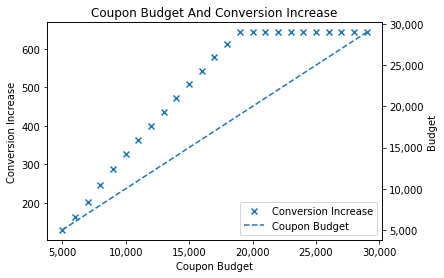

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(df_res["max_budget"], df_res["inc_conv"], marker="x", label="Conversion Increase")
ax2.plot(df_res["max_budget"], df_res["max_budget"], "--", label="Coupon Budget")
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.0f}"))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.0f}"))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.0f}"))
ax1.set_xlabel("Coupon Budget")
ax1.set_ylabel("Conversion Increase")
ax2.set_ylabel("Budget")
reg1, label1 = ax1.get_legend_handles_labels()
reg2, label2 = ax2.get_legend_handles_labels()
ax2.legend(reg1 + reg2, label1 + label2, loc="lower right")
plt.title("Coupon Budget And Conversion Increase")
plt.show()

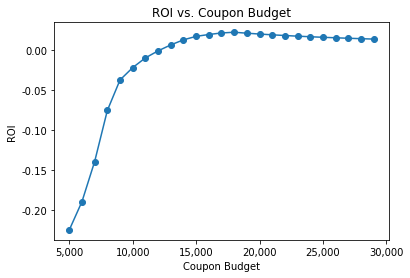

In [12]:
ax = plt.axes()
ax.plot(df_res["max_budget"], df_res["roi"], "-o")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.0f}"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.2f}"))
ax.set_xlabel("Coupon Budget")
ax.set_ylabel("ROI")
plt.title("ROI vs. Coupon Budget")
plt.show()

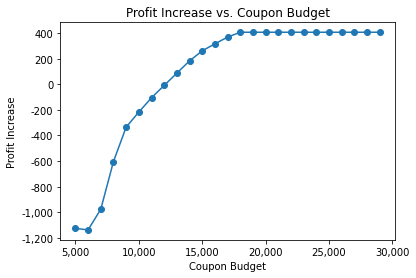

In [13]:
ax = plt.axes()
ax.plot(df_res["max_budget"], df_res["inc_profit"], "-o")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.0f}"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x :,.0f}"))
ax.set_xlabel("Coupon Budget")
ax.set_ylabel("Profit Increase")
plt.title("Profit Increase vs. Coupon Budget")
plt.show()